# <center> <b>Klasifikacija - SVM, MLP i SGD</b> </center>
## <center> Matematičke osnove strojnog učenja </center>
## <center> Druga domaća zadaća </center>
### <center> Doris Đivanović </center>


# Zadatak

Iz izvora po želji (Internet, biblioteka `sklearn` (`datasets`), biblioteka `pydataset`, ...) učitajte podatke kao `DataFrame` objekt. Vodite računa da učitani podaci imaju barem dvije varijable, od kojih barem jedna poprima konačno mnogo vrijednosti, tj. skup podataka je pogodan za primjenu klasifikacijskih algoritama strojnog učenja. Na podatke primijenite SVM (uz korištenje različitih jezgri), neuronsku mrežu i SGD algoritme te na osnovu napravljene analize donesite zaključke. Unutar koda komentirajte sve korištene naredbe te komentirajte sve izvedene zaključke. 

# Podaci

Za *dataset* na kojem ću provesti klasifikacijske algoritme iskoristit ću **Breast Cancer Wisconsin** *dataset*, koji je ugrađen u modulu `datasets` biblioteke `scikit-learn`.

In [1]:
# iz biblioteke scikit-learn, iz modula datasets, učitavamo funkciju load_breast_cancer,
# koja učitava Breast Cancer Wisconsin dataset
from sklearn.datasets import load_breast_cancer

# informirati se o funkciji load_breast_cancer
#?load_breast_cancer

# ==> ova funkcija vraća Bunch objekt s određenim svojstvima
# ukoliko postavimo argument as_frame = True,
# imat će svojstva data, target i frame 
# kao Pandas DataFrame-ove (data i frame), i Pandas Series (target)
bc_dataset = load_breast_cancer(as_frame = True)

# ispis prvih pet redaka dataset-a, radi upoznavanja s podacima (i target-om)
print(bc_dataset.frame.head())  # frame je DataFrame

X = bc_dataset.data   # data je DataFrame
y = bc_dataset.target  # y je Series

# upoznavanje s dimenzijom i ukupnim brojem podataka
print("X shape: ", X.shape)
print("Y shape: ", y.shape)

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

## Veličina, dimenzija i sadržaj skupa podataka

Podataka, dakle, ima ukupno $569$ i imaju $30$ varijabli (svojstava), čija su imena vidljiva u gornjem ispisu.

Primijetimo da iz gornjeg ispisa saznajemo samo za jednu klasu podataka, označenu s $0$.

## Provjera nedostajućih vrijednosti

Postoje li, gdje, i u kolikoj mjeri, u danom skupu podataka nedostajuće vrijednosti, bilo među podacima, bilo među *oznakama* u *target*-u, možemo provjeriti, na primjer, na sljedeći način, sumiranjem indikatora po svakoj pojedinoj varijabli, tj. stupcu *dataset*-a, i po stupcu koji predstavlja *target*:

In [2]:
bc_dataset.frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

Dakle, u danom skupu podataka **nema nedostajućih vrijednosti**.

Primijetimo da smo i na ovaj način saznali imena svih varijabli u skupu podataka.

## Broj i ravnoteža klasa

Broj različitih klasa danih podataka, ali i količinu podataka po klasama, možemo saznati, na primjer, na sljedeći način:

In [3]:
print(y.value_counts())

target
1    357
0    212
Name: count, dtype: int64


Dakle, dani **skup podataka podijeljen je u dvije klase**, označene s $0$ i $1$. Dakle, klasifikacija ovih podataka je **binarna klasifikacija**.

Budući da se radi o podacima vezanim za rak dojke, klasa $0$ vjerojatno predstavlja maligne promjene, a klasa $1$ benigne.

Nadalje, klasi $0$ pripada $212$, a klasi $1$ pripada $357$ podataka, što je **relativno dobro uravnoteženo**, tj. nijedna od dvije klase ne obuhvaća značajnu većinu podataka.

## Podjela podataka na skupove za treniranje i testiranje

**Napomena.** Izvršiti sljedeću ćeliju odmah na početku (potrebno za sve korištene modele).

In [4]:
# metoda za provodenje podjele skupa podataka
# na skupove za treniranje i testiranje
# u zeljenom omjeru
from sklearn.model_selection import train_test_split

# metoda za racunanje accuracy score metrike za evaluaciju modela
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# SVM algoritam

SVM algoritam možemo provesti s pomoću klase `SVC` (*Support Vector Classifier*) iz modula `svm` biblioteke `scikit-learn`.

In [5]:
from sklearn.svm import SVC

# informirati se o klasi SVC
#?SVC

## 3D-vizualizacija (linearna jezgra)

Najprije ćemo provesti jednu SVM klasifikaciju na našim podacima čije ćemo rezultate, dakle klasifikaciju podataka, optimalnu hiperravninu, tj. hiperravninu ili granicu *odluke*, marginalne hiperravnine, te podatke koji su potporni vektori, vizualizirati. 

To ćemo napraviti koristeći potrebne informacije (parametre i koeficijente optimalne hipperavnine te skup potpornih vektora) pohranjene u objektu klase `SVC` nakon treniranja modela. 

Očito, vizualizirati možemo samo jednodimenzionalne, dvodimenzionalne ili trodimenzionalne podatke i objekte. Dvodimenzionalna hiperravnina je pravac, a trodimenzionalna hiperravnina je ravnina.

Budući da smo na predavanjima pokazali dvodimenzionalni primjer, **ovdje ćemo napraviti trodimenzionalni primjer**.

Podaci, dakle, moraju biti trodimenzionalni, a naši su dimenzije $30$. Stoga, **od $30$ varijabli naših podataka, promatrat ćemo samo neke tri varijable**.

Provedbu SVM algoritma i vizualizaciju za trodimenzionalan skup podataka implementiramo sljedećom (detaljno komentiranom) funkcijom, koja **kao parametar prima listu triju odabranih varijabli podataka**. Dakle, možemo testirati algoritam s raznim kombinacijama triju od $30$ varijabli podataka.

Svakako, bilo bi poželjno odrediti koje su tri varijable najpogodnije za klasifikaciju danih podataka, za što bi bila potrebna detaljna analiza. Za prvu ruku, mogli bismo na temelju samih naziva varijabli pokušati pretpostaviti koje bi varijable mogle biti više, a koje manje relevantne, posebno koje su međusobno isključive, za binarnu klasifikaciju općenito, a i za dijagnozu raka dojke.

**Napomena.** Vizualizacija graničnih ploha koje daje SVM algoritam jednostavna je samo ukoliko ga provodimo s **linearnom jezgrom**, pa ćemo algoritam provesti objektom klase `SVC(kernel = 'linear')`.

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # potrebno za 3D plot
import numpy as np 

def plot_svm_3d(X, y, three_features):

    # podjela skupa podataka s tri odabrana svojstva/varijable,
    # na skup za treniranje i skup za testiranje
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

    # ovo je potrebno za 3D plot
    ax = plt.axes(projection = '3d')
    
    # skiciranje skupa podataka za treniranje - smjesteni po retcima u tri stupca dataseta,
    # postavljanje velicine (size) na npr. 12,
    # bojanje (color - c) tocaka podataka 
    # s obzirom na klasu kojoj pripadaju (odgovarajuca vrijednost u y_train)
    ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2],
               s = 12, c = y_train, edgecolors = "k")

    # postavljanje naziva varijabli uz odgovarajuce osi
    ax.set_xlabel(three_features[0])
    ax.set_ylabel(three_features[1])
    ax.set_zlabel(three_features[2])

    ax.view_init(elev = 10, azim = 180)  # mijenjati kutove s obzirom na vidljivost/citljivost dobivenog grafa
    
    ax.set_title("Linear SVM: Decision Plane, Margins, and Support Vectors")

    # treniranje Support Vector Classifier-a s LINEARNOM jezgrenom funkcijom
    clf_lin = SVC(kernel = 'linear')
    # na odabranim podacima za treniranje
    clf_lin.fit(X_train, y_train)

    # podatke koji su potporni vektori 
    # na grafu oznacavamo zaokruzivanjem zelenom bojom
    # sljedecim postavkama
    ax.scatter(clf_lin.support_vectors_[:, 0],
               clf_lin.support_vectors_[:, 1],
               clf_lin.support_vectors_[:, 2],
               s = 50, facecolors = "none", edgecolors = "g")

    # pristup dobivenim parametrima optimalne (hiper)ravnine
    w = clf_lin.coef_[0]       # vektor duljine 3
    b = clf_lin.intercept_[0]  # skalar

    # za skiciranje optimalne (hiper)ravnine i marginalnih ravnina
    # odabiremo "resetku" x i y koordinata podataka 
    # unutar pravokutnika kojeg daju rasponi vrijednosti koordinata x i y 
    # podataka za treniranje
    x_points = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 20)
    y_points = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 20)

    # Kartezijev produkt svih odabranih x i y koordinata ==> resetka tocaka (x, y)
    x_meshgrid, y_meshgrid = np.meshgrid(x_points, y_points)

    # Jednadzba (hiper)ravnine: 
    # funkcija_odluke(x, y, z) = 0, 
    # tj. w0*x + w1*y + w2*z + b = 0 
    # ==> izraziti z koordinatu preko poznatih x i y
    z_points = -(w[0]*x_meshgrid + w[1]*y_meshgrid + b) / w[2]

    # Crtanje ravnine u 3D iz poznatih tocaka
    ax.plot_surface(x_meshgrid, y_meshgrid, z_points, alpha = 0.3, color = "red")

    # Jednadzbe marginalnih ravnina: w0*x + w1*y + w2*z + b = +/- 1
    # ==> izraziti z koordinatu preko poznatih x i y
    z_points_plus  = -(w[0]*x_meshgrid + w[1]*y_meshgrid + (b-1)) / w[2]
    z_points_minus = -(w[0]*x_meshgrid + w[1]*y_meshgrid + (b+1)) / w[2]

    # Crtanje marginalnih ravnina iz poznatih tocaka
    ax.plot_surface(x_meshgrid, y_meshgrid, z_points_plus, alpha = 0.2, color = "blue")
    ax.plot_surface(x_meshgrid, y_meshgrid, z_points_minus, alpha = 0.2, color = "green")

    # jedinicna normala optimalne ravnine (okomita na optimalnu ravninu)
    # w_hat = w / ||w||
    w_hat = w / np.sqrt(np.sum(w ** 2))    # w / np.linalg.norm(w)
    # udaljenost od opt. ravnine do marginalnih ravnina
    # margina = 1 / ||w||
    margin = 1 / np.sqrt(np.sum(w ** 2))   # 1 / np.linalg.norm(w) 

    # lista (x, y, z) tocaka optimalne (hiper)ravnine 
    # (funkcija ravel vektorizira matricu)
    decision_boundary_points = np.column_stack([x_meshgrid.ravel(), y_meshgrid.ravel(), z_points.ravel()])  
    # marginalne ravnine - optimalna ravnina shift-ana duz svoje normale za +/- 1/||w||
    #points_above = decision_boundary_points + w_hat * margin
    #points_below = decision_boundary_points - w_hat * margin

    # Izracunate z-koordinate tocaka marginalnih ravnina 
    # slazemo u matricu koja odgovara resetki s tockama (x, y) 
    #z_points_pluss  = points_above[:, 2].reshape(x_meshgrid.shape)
    #z_points_minuss = points_below[:, 2].reshape(x_meshgrid.shape)

    # Crtanje marginalnih ravnina iz poznatih tocaka
    #ax.plot_surface(x_meshgrid, y_meshgrid, z_points_pluss,  alpha = 0.12, color = 'navy')
    #ax.plot_surface(x_meshgrid, y_meshgrid, z_points_minuss, alpha = 0.12, color = 'darkgreen')

    # primjena modela na podatke za testiranje (predvidanje klasa)
    y_pred = clf_lin.predict(X_test)
    # evaluacija modela racunanjem accuracy score metrike
    score = accuracy_score(y_test, y_pred)

    print(f"\n Variables: {three_features[0]}, {three_features[1]}, {three_features[2]}")
    print("\n SVM with LINEAR kernel accuracy score: ", score, "\n")

    plt.show() # NUZNO za neinteraktivna okruzenja, inace se graf nece prikazati


**Napomena.** Gornju funkciju **možete pozvati s raznim kombinacijama triju od $30$ varijabli** podataka. 

Pokušajte, na primjer, na temelju samih naziva varijabli, pretpostaviti koje bi varijable mogle biti više, a koje manje relevantne, posebno koje su međusobno isključive, za binarnu klasifikaciju općenito, a i za dijagnozu raka dojke.

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

 Variables: mean texture, mean concavity, worst symmetry

 SVM with LINEAR kernel accuracy score:  0.8888888888888888 



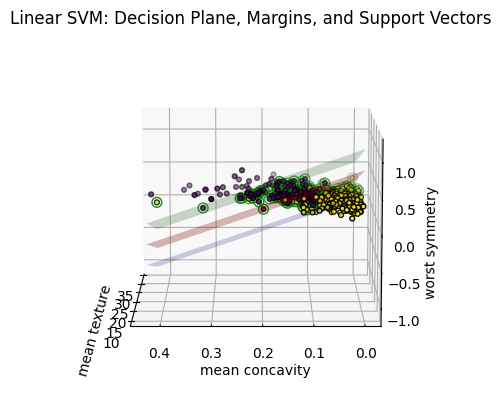

In [7]:
# kako bismo se podsjetili imena svih varijabli u X, mozemo pozvati
# X.columns (ili X.columns.values)
print(X.columns.values)

# u ovu listu postaviti tri varijable koje zelimo promatrati
three_features = ["mean texture", "mean concavity", "worst symmetry"] 

# izdvojiti samo te stupce iz X u novi DataFrame objekt
X_three_features = X[three_features] # ovo je DataFrame objekt

# provjere
#print("X_three_features shape:", X_three_features.shape)
#print("X_three_features columns:", X_three_features.columns.values)

# scikit-learn (pa i classifier-i) radi s NumPy array-ima,
# pa je sigurnije Pandas DataFrame pretvoriti u NumPy array
X_three_features = X_three_features.to_numpy() 
#y = y.to_numpy()

plot_svm_3d(X_three_features, y, three_features)

## Razne jezgre 

Glavni parametar za SVM algoritam je odabrana jezgrena funkcija, odnosno za konstrukciju objekta klase `SVC` glavni je parametar `kernel`.

Ukoliko pretpostavimo da su podaci na kojima provodimo klasifikacijski SVM algoritam linearno separabilni, možemo koristiti linearnu jezgru. Inače, postoje razne nelinearne jezgre.

**Napomena.** Prethodno izvršiti naredbu za podjelu skupa podataka `X` (i *target*-a `y`) na skup za treniranje `X_train` (`y_train`) i skup za testiranje `X_test` (`y_test`).

### Linearna jezgra

Pretpostavljamo da su podaci linearno separabilni, te kao parametar za SVM algoritam koristimo linearnu jezgru:
$$K \ : \ X \times X \rightarrow \mathbb{R}, \qquad K(x, x') = <x, x'>.$$
Tada, za konstrukciju objekta klase `SVC`, s pomoću kojeg ćemo provesti SVM algoritam na podacima za treniranje, kao parametar koristimo `kernel = 'linear'`.

In [8]:
# treniranje Support Vector Classifier-a s LINEARNOM jezgrenom funkcijom
clf_lin = SVC(kernel = 'linear')
# na odabranim podacima za treniranje
clf_lin.fit(X_train, y_train)

SVC(kernel='linear')

In [9]:
# primjena modela na podatke za testiranje (predvidanje klasa)
y_pred = clf_lin.predict(X_test)
# evaluacija modela racunanjem accuracy score metrike
score = accuracy_score(y_test, y_pred)
print(score)

0.956140350877193


### Polinomna jezgra

Kao parametar za SVM algoritam koristimo polinomnu jezgru:
$$K \ : \ X \times X \rightarrow \mathbb{R}, \qquad K(x, x') = (\gamma <x, x'> + \ r)^d.$$
Tada, za konstrukciju objekta klase `SVC`, s pomoću kojeg ćemo provesti SVM algoritam na podacima za treniranje, kao parametar koristimo `kernel = 'poly'`.

In [10]:
# treniranje Support Vector Classifier-a s POLINOMNOM jezgrenom funkcijom
clf_poly = SVC(kernel = 'poly')
# na odabranim podacima za treniranje
clf_poly.fit(X_train, y_train)

SVC(kernel='poly')

In [11]:
# primjena modela na podatke za testiranje (predvidanje klasa)
y_pred = clf_poly.predict(X_test)
# evaluacija modela racunanjem accuracy score metrike
score = accuracy_score(y_test, y_pred)
print(score)

0.9122807017543859


### RBF jezgra

Kao parametar za SVM algoritam koristimo rbf jezgru:
$$K \ : \ X \times X \rightarrow \mathbb{R}, \qquad K(x, x') = exp(-\gamma||x-x'||^2).$$
Tada, za konstrukciju objekta klase `SVC`, s pomoću kojeg ćemo provesti SVM algoritam na podacima za treniranje, kao parametar koristimo `kernel = 'rbf'`.

In [12]:
# treniranje Support Vector Classifier-a s RBF jezgrenom funkcijom
clf_rbf = SVC(kernel = 'rbf')
# na odabranim podacima za treniranje
clf_rbf.fit(X_train, y_train)

SVC()

In [13]:
# primjena modela na podatke za testiranje (predvidanje klasa)
y_pred = clf_rbf.predict(X_test)
# evaluacija modela racunanjem accuracy score metrike
score = accuracy_score(y_test, y_pred)
print(score)

0.9298245614035088


### Sigmoidalna jezgra

Kao parametar za SVM algoritam koristimo sigmoidalnu jezgru:
$$K \ : \ X \times X \rightarrow \mathbb{R}, \qquad K(x, x') = \tanh(\gamma <x, x'> + \ r).$$
Tada, za konstrukciju objekta klase `SVC`, s pomoću kojeg ćemo provesti SVM algoritam na podacima za treniranje, kao parametar koristimo `kernel = 'sigmoid'`.

In [14]:
# treniranje Support Vector Classifier-a sa SIGMOIDALNOM jezgrenom funkcijom
clf_sig = SVC(kernel = 'sigmoid')
# na odabranim podacima za treniranje
clf_sig.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [15]:
# primjena modela na podatke za testiranje (predvidanje klasa)
y_pred = clf_sig.predict(X_test)
# evaluacija modela racunanjem accuracy score metrike
score = accuracy_score(y_test, y_pred)
print(score)

0.4649122807017544


**Komentar.** *Accuracy score* za SVM algoritam sa sigmoidalnom jezgrom, za naše podatke, očito je daleko niži od onog za sve ostale primijenjene jezgre, a i općenito je sam po sebi nizak.

## 2D-vizualizacija `scikit-learn` klasifikacije

Za vizualizaciju rezultata bilo koje `scikit-learn` klasifikacije možemo iskoristiti ugrađenu klasu `DecisionBoundaryDisplay` iz modula `inspection`. S pomoću nje je moguće vizualizirati samo **dvodimenzionalne** podatke. Za trodimenzionalne podatke slična ugrađena klasa ne postoji.

Klasa `DecisionBoundaryDisplay` u svojim metodama koristi potrebne informacije pohranjene u objektu klase odgovarajućeg `scikit-learn` klasifikatora nakon treniranja modela. 

Klasa vizualizira rezultate klasifikacije crtanjem granica pojedinih klasa podataka te ispunom područja svake klase zasebnom bojom.

Podaci, dakle, moraju biti dvodimenzionalni, a naši su dimenzije $30$. Stoga, ukoliko neku klasifikaciju naših podataka želimo vizualizirati upotrebom `DecisionBoundaryDisplay` klase, **od $30$ varijabli naših podataka, možemo promatrati samo neke dvije varijable**.


## 2D-vizualizacija - SVM (sve spomenute jezgre)

Klasa `DecisionBoundaryDisplay`, osim područja i granica pojedinih klasa podataka, za dobiveni, već istrenirani, objekt klase `SVC`, sposobna je vizualizirati i linije *odluke* dobivene iz konkretne funkcije odluke SVM algoritma, dakle liniju ili krivulju *odluke* i marginalne linije. 

Treniranje SVC modela na dvodimenzionalnom skupu podataka, vizualizaciju podataka za treniranje i potpornih vektora, područja i granica pojedinih klasa, te optimalne i marginalnih krivulja *odluke* (vizualizaciju područja klasa i krivulja *odluke* upotrebom klase `DecisionBoundaryDisplay`) implementiramo sljedećom (detaljno komentiranom) funkcijom, koja **kao parametar prima željenu jezgrenu funkciju**.

Funkcija, također, **prima i listu dviju odabranih varijabli podataka**. Dakle, možemo testirati algoritam s raznim kombinacijama dviju od $30$ varijabli podataka.

Kao što je već spomenuto, bilo bi poželjno odrediti koje su dvije varijable najrelevantnije za klasifikaciju danih podataka, za što bi bila potrebna detaljna analiza. Za prvu ruku, mogli bismo na temelju samih naziva varijabli pokušati pretpostaviti koje bi varijable mogle biti više, a koje manje relevantne, posebno koje su međusobno isključive, za binarnu klasifikaciju općenito, a i za dijagnozu raka dojke.

In [16]:
# ugrađeni 2D vizualizator granica odluke
from sklearn.inspection import DecisionBoundaryDisplay

import numpy as np
import matplotlib.pyplot as plt
# za svaki slucaj ponoviti import
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

def plot_training_data_with_decision_boundary_svm(X, y, two_features, kernel):

    # podjela skupa podataka s dva odabrana svojstva/varijable,
    # na skup za treniranje i skup za testiranje
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

    # treniranje Support Vector Classifier-a s odabranom jezgrenom funkcijom
    clf =  SVC(kernel = kernel)
    # na odabranim podacima za treniranje
    clf.fit(X_train, y_train)

    # kreiranje "slike" - okvira dijagrama i koordinatnih osi
    _, ax = plt.subplots(figsize = (6, 5))

    # postavljanje raspona vrijednosti na koordinatnim osima,
    # dinamicki, na temelju raspona vrijednosti koordinata konkretnih podataka za treniranje
    # + malo prosiriti raspone izvan raspona podataka, npr. ovako:
    pad_x = 0.05 * (X_train[:, 0].max() - X_train[:, 0].min() + 1e-9)
    pad_y = 0.05 * (X_train[:, 1].max() - X_train[:, 1].min() + 1e-9)
    
    ax.set(
        xlim = (X_train[:, 0].min() - pad_x, X_train[:, 0].max() + pad_x),
        ylim = (X_train[:, 1].min() - pad_y, X_train[:, 1].max() + pad_y)
    )

    # parametre koji imaju iste vrijednosti za dva razlicita poziva metode
    # mozemo postaviti u jedan rjecnik (prikladno, parovi "naziv_argumenta": vrijednost)
    # pa njega predati metodi
    common_params = {"estimator": clf, "X": X_train, "ax": ax} # Python dictionary

    # ova metoda klase DecisionBoundaryDisplay, s ovim parametrima,
    # evaluira klasifikator clf na resetki tocaka iz X_train
    # koja se nalazi unutar pravokutnika kojeg daju rasponi od ax 
    # i boja pozadinu/podrucje podataka (na ax) s obzirom na klasu kojoj pripadaju
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method = "predict",
        plot_method = "pcolormesh", # pseudocolor mesh
        alpha = 0.3,
    ) 

    # ova metoda klase DecisionBoundaryDisplay, s ovim parametrima,
    # (na ax) crta "granice" dobivene iz funkcije odluke SVM algoritma:
    # krivulju odluke (fja = 0) te marginalne krivulje (fja = +/-1)
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method = "decision_function", # funkcija odluke SVM algoritma
        plot_method = "contour", # crtanje "kontura"
        levels = [-1, 0, 1],
        colors = ["k", "k", "k"],
        linestyles = ["--", "-", "--"], # ==> linija odluke je puna, marginalne su isprekidane
    )

    # podatke koji su potporni vektori 
    # na grafu oznacavamo zaokruzivanjem zelenom bojom
    # sljedecim postavkama
    ax.scatter(
            clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s = 150,
            facecolors = "none",
            edgecolors = "g",
        )

    # skiciranje skupa podataka za treniranje,
    # dvodimenzionalni - smjesteni po retcima u dva stupca dataseta,
    # postavljanje velicine (size) na npr. 30,
    # bojanje (color - c) tocaka podataka 
    # s obzirom na klasu kojoj pripadaju (odgovarajuca vrijednost u y_train)
    ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, s = 30, edgecolors = "k")

    # postavljanje naziva varijabli uz odgovarajuce osi
    ax.set_xlabel(two_features[0])
    ax.set_ylabel(two_features[1])
    
    ax.set_title(f"SVM ({kernel}) on {two_features[0]} and {two_features[1]}")

    plt.show() # NUZNO za neinteraktivna okruzenja, inace se graf nece prikazati

**Napomena.** Gornju funkciju **možete pozvati s raznim kombinacijama dviju od $30$ varijabli** podataka. 

Pokušajte, na primjer, na temelju samih naziva varijabli, pretpostaviti koje bi varijable mogle biti više, a koje manje relevantne, posebno koje su međusobno isključive, za binarnu klasifikaciju općenito, a i za dijagnozu raka dojke.

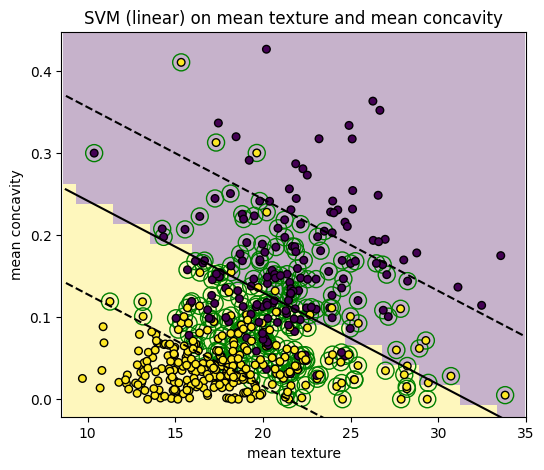

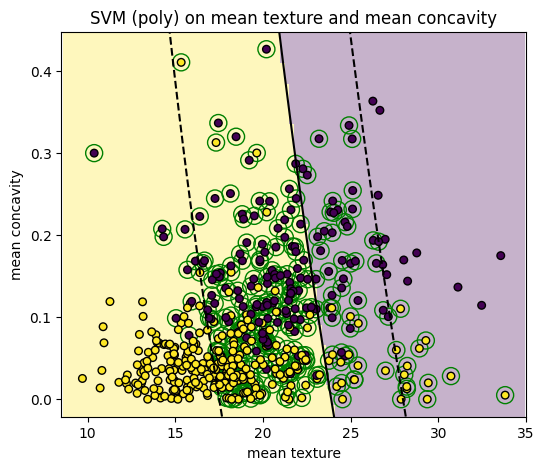

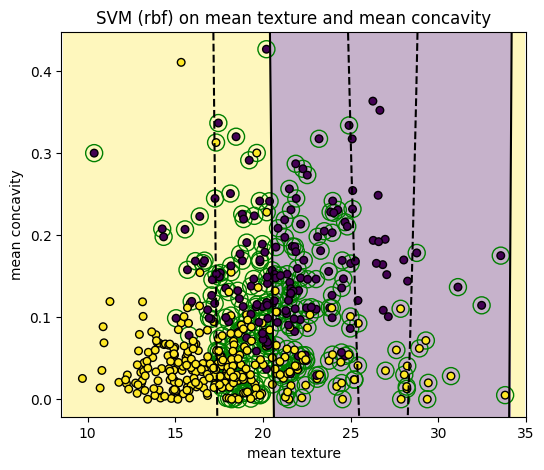

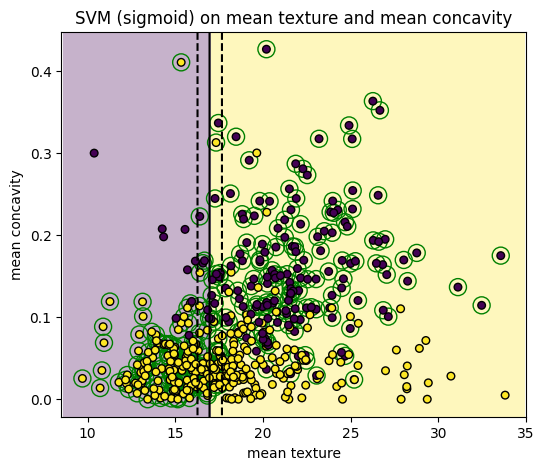

In [17]:
# kako bismo se podsjetili imena svih varijabli u X, mozemo pozvati
# X.columns (ili X.columns.values)
#print(X.columns.values)

# u ovu listu postaviti dvije varijable koje zelimo promatrati
two_features = ["mean texture", "mean concavity"] 

# izdvojiti samo te stupce iz X u novi DataFrame objekt
X_two_features = X[two_features] # ovo je DataFrame objekt

# provjere
#print("X_two_features shape:", X_two_features.shape)
#print("X_two_features columns:", X_two_features.columns.values)

# scikit-learn (pa i classifier-i) radi s NumPy array-ima,
# pa je sigurnije Pandas DataFrame pretvoriti u NumPy array
X_two_features = X_two_features.to_numpy() 
#y = y.to_numpy()

plot_training_data_with_decision_boundary_svm(X_two_features, y, two_features, "linear")
plot_training_data_with_decision_boundary_svm(X_two_features, y, two_features, "poly")
plot_training_data_with_decision_boundary_svm(X_two_features, y, two_features, "rbf")
plot_training_data_with_decision_boundary_svm(X_two_features, y, two_features, "sigmoid")

# Neuronska mreža

Primjenu neuronske mreže možemo provesti s pomoću klase `MLPClassifier` (*MultyLayerPerceptron*) iz modula `neural_network` biblioteke `scikit-learn`.

In [18]:
from sklearn.neural_network import MLPClassifier

Za konstrukciju objekta klase `MLPClassifier` ključni su sljedeći parametri (preuzeto iz nastavnih materijala profesora Sandrića):

- `hidden_layer_sizes = (l_1, ..., l_d)`: $d$ označava broj skrivenih nivoa, a broj $l_i$ označava broj čvorova u nivou $i$.
- `activation = 'string'`: označava korištenu funkciju aktivacije: `relu` ($f(x) = \max\{0,x\}$), `identity` ($f(x) = x$), `logistic` ($f(x) = 1/(1+\exp(-x))$) i `tanh`($f(x) = \tanh(x)$). 
- `solver = 'string'`: odabrana metoda korištena za određivanje optimalnih parametara: `sgd`, `adam` (određena modifikacija SGD-a) i `lbfgs` (optimizacijska metoda iz klase kvazi-Newtonovih metoda).
- `alpha = float`: parametar regularizacije ($L^2$-regularizacija) koji minimizira *overfitting* penaliziranjem parametara velikih vrijednosti.
- `learning_rate_ini = float`: parametar učenja preko kojega se kontrolira veličina koraka prilikom traženja optimalnih parametara modela (koristi se kod `sgd` i `adam`).

In [19]:
# treniranje MultiLayer Perceptron Classifier-a 
# ==> namjestati parametre
clf_mlp = MLPClassifier(max_iter = 1000, solver = 'sgd', alpha = 1e-5, hidden_layer_sizes = (50, 80, 40), random_state = 1)
# na odabranim podacima za treniranje
clf_mlp.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(50, 80, 40), max_iter=1000,
              random_state=1, solver='sgd')

In [20]:
# primjena modela na podatke za testiranje (predvidanje klasa)
y_pred = clf_mlp.predict(X_test)
# evaluacija modela racunanjem accuracy score metrike
score = accuracy_score(y_test, y_pred)
print(score)

0.9298245614035088


## 2D-vizualizacija

Kao što je već rečeno, uporabom klase `DecisionBoundaryDisplay`, možemo vizualizirati granice i područja pojedinih klasa dvodimenzionalnih podataka dobivenih bilo kojom `scikit-learn` klasifikacijom. 

Podaci, ponavljamo, moraju biti dvodimenzionalni, a naši su dimenzije $30$. Stoga, **od $30$ varijabli naših podataka, promatrat ćemo samo neke dvije varijable**.

Treniranje odgovarajućeg modela na dvodimenzionalnom skupu podataka, vizualizaciju podataka za treniranje, te vizualizaciju područja i granica pojedinih klasa uporabom klase `DecisionBoundaryDisplay`, implementiramo sljedećom (detaljno komentiranom) funkcijom, koja **kao parametar prima željeni klasifikator**.

Funkcija, također, prima i **listu dviju odabranih varijabli podataka**. Dakle, i ovaj algoritam možemo testirati s raznim kombinacijama dviju od $30$ varijabli podataka.

Kao što je već spomenuto, bilo bi poželjno odrediti koje su dvije varijable najrelevantnije za klasifikaciju danih podataka, za što bi bila potrebna detaljna analiza. Za prvu ruku, mogli bismo na temelju samih naziva varijabli pokušati pretpostaviti koje bi varijable mogle biti više, a koje manje relevantne, posebno koje su međusobno isključive, za binarnu klasifikaciju općenito, a i za dijagnozu raka dojke.

In [27]:
# ugrađeni 2D vizualizator klasifikacije podataka
from sklearn.inspection import DecisionBoundaryDisplay

import matplotlib.pyplot as plt

def plot_training_data_with_decision_boundary(X, y, two_features, clf):

    # podjela skupa podataka s dva odabrana svojstva/varijable,
    # na skup za treniranje i skup za testiranje
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

    # treniranje odabranog klasifikatora na odabranim podacima za treniranje
    clf.fit(X_train, y_train)

    # kreiranje "slike" - okvira dijagrama i koordinatnih osi
    _, ax = plt.subplots(figsize = (6, 5))

    # postavljanje raspona vrijednosti na koordinatnim osima,
    # dinamicki, na temelju raspona vrijednosti koordinata konkretnih podataka za treniranje
    # + malo prosiriti raspone izvan raspona podataka, npr. ovako:
    pad_x = 0.05 * (X_train[:, 0].max() - X_train[:, 0].min() + 1e-9)
    pad_y = 0.05 * (X_train[:, 1].max() - X_train[:, 1].min() + 1e-9)
    
    ax.set(
        xlim = (X_train[:, 0].min() - pad_x, X_train[:, 0].max() + pad_x),
        ylim = (X_train[:, 1].min() - pad_y, X_train[:, 1].max() + pad_y)
    )

    # parametre koji imaju iste vrijednosti za dva razlicita poziva metode
    # postavimo u jedan rjecnik (prikladno, parovi "naziv_argumenta": vrijednost)
    #pa njega predamo metodi
    common_params = {"estimator": clf, "X": X_train, "ax": ax} # Python dictionary

    # ova metoda klase DecisionBoundaryDisplay, s ovim parametrima,
    # evaluira klasifikator clf na resetki tocaka iz X_train
    # koja se nalazi unutar pravokutnika kojeg daju rasponi od ax 
    # i boja pozadinu/podrucje podataka (na ax) s obzirom na klasu kojoj pripadaju
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method = "predict",
        cmap = plt.cm.coolwarm,  #colormap
        alpha = 0.3
    )

    # skiciranje skupa podataka za treniranje,
    # dvodimenzionalni - smjesteni po retcima u dva stupca dataseta,
    # postavljanje velicine (size) na npr. 30,
    # bojanje (color - c) tocaka podataka 
    # s obzirom na klasu kojoj pripadaju (odgovarajuca vrijednost u y_train)
    ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, s = 30, edgecolors = "k")   

    # postavljanje naziva varijabli uz odgovarajuce osi
    ax.set_xlabel(two_features[0])
    ax.set_ylabel(two_features[1])
    
    ax.set_title(f"{clf} on {two_features[0]} and {two_features[1]}")

    # primjena modela na podatke za testiranje (predvidanje klasa)
    y_pred = clf.predict(X_test)
    # evaluacija modela racunanjem accuracy score metrike
    score = accuracy_score(y_test, y_pred)

    print(f"\n {clf} accuracy score: {score} \n")

    plt.show() # NUZNO za neinteraktivna okruzenja, inace se graf nece prikazati

**Napomena.** Gornju funkciju **možete pozvati s raznim kombinacijama dviju od $30$ varijabli** podataka.

Pokušajte, na primjer, na temelju samih naziva varijabli, pretpostaviti koje bi varijable mogle biti više, a koje manje relevantne za dijagnozu raka dojke.

**Napomena.** U donjoj ćeliji **namještajte parametre MLP klasifikatora** (i željene dvije varijable).

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

 MLPClassifier(alpha=1e-05, hidden_layer_sizes=(50, 80, 40), max_iter=1000,
              random_state=1, solver='sgd') accuracy score: 0.9473684210526315 



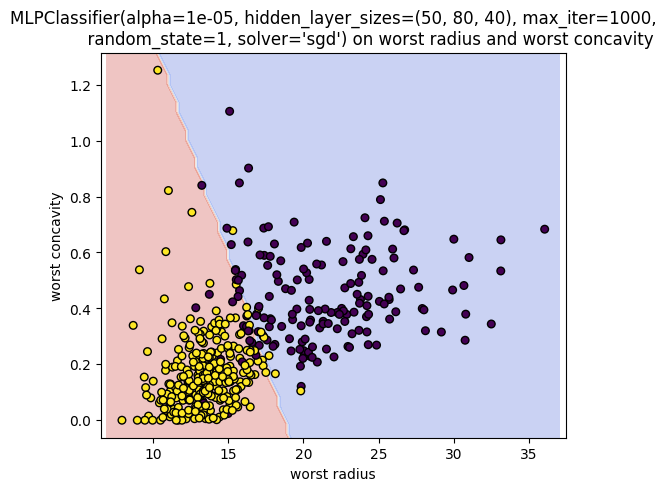

In [22]:
# za svaki slucaj ponoviti import
from sklearn.neural_network import MLPClassifier

# MultiLayer Perceptron Classifier ==> namjestati parametre
clf_mlp = MLPClassifier(max_iter = 1000, solver = 'sgd', alpha = 1e-5, hidden_layer_sizes = (50, 80, 40), random_state = 1)

# kako bismo se podsjetili imena svih varijabli u X, mozemo pozvati
# X.columns (ili X.columns.values)
print(X.columns.values)

# u ovu listu postaviti dvije varijable koje zelimo promatrati
two_features = ["worst radius", "worst concavity"] 

# izdvojiti samo te stupce iz X u novi DataFrame objekt
X_two_features = X[two_features] # ovo je DataFrame objekt

# provjere
#print("X_two_features shape:", X_two_features.shape)
#print("X_two_features columns:", X_two_features.columns.values)

# scikit-learn (pa i classifier-i) radi s NumPy array-ima,
# pa je sigurnije Pandas DataFrame pretvoriti u NumPy array
X_two_features = X_two_features.to_numpy() 
#y = y.to_numpy()

plot_training_data_with_decision_boundary(X_two_features, y, two_features, clf_mlp)

# SGD algoritam

SGD algoritam možemo provesti s pomoću klase `SGDClassifier` (*Stochastic Gradient Descent*) iz modula `linear_model` biblioteke `scikit-learn`.

Glavni parametar za konstrukciju objekta klase `SGDClassifier`je funkcija gubitka (*loss function*), s vrijednostima npr. `"log_loss"` ili `"hinge"`.

In [23]:
from sklearn.linear_model import SGDClassifier

In [24]:
# treniranje Stochastic Gradient Descent Classifier-a (log-loss funkcija gubitka)
clf_sgd = SGDClassifier(loss = "log_loss")
# na odabranim podacima za treniranje
clf_sgd.fit(X_train, y_train)

SGDClassifier(loss='log_loss')

In [25]:
# primjena modela na podatke za testiranje (predvidanje klasa)
y_pred = clf_sgd.predict(X_test)
# evaluacija modela racunanjem accuracy score metrike
score = accuracy_score(y_test, y_pred)
print(score)

0.8333333333333334


## 2D-vizualizacija

**Napomena.** Funkciju **možete pozvati s raznim kombinacijama dviju od $30$ varijabli** podataka.

Pokušajte, na primjer, na temelju samih naziva varijabli, pretpostaviti koje bi varijable mogle biti više, a koje manje relevantne za dijagnozu raka dojke.

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

 SGDClassifier() accuracy score: 0.8947368421052632 



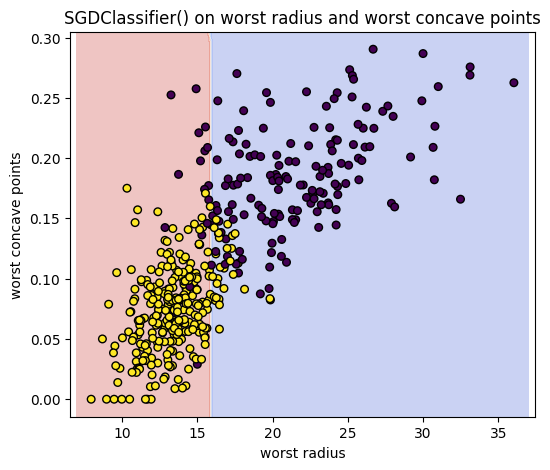

In [26]:
# za svaki slucaj ponoviti import
from sklearn.linear_model import SGDClassifier

# Stochastic Gradient Descent Classifier ==> namjestiti funkciju gubitka
clf_sgd = SGDClassifier(loss = "hinge")

# kako bismo se podsjetili imena svih varijabli u X, mozemo pozvati
# X.columns (ili X.columns.values)
print(X.columns.values)

# u ovu listu postaviti dvije varijable koje zelimo promatrati
two_features = ["worst radius", "worst concave points"] 

# izdvojiti samo te stupce iz X u novi DataFrame objekt
X_two_features = X[two_features] # ovo je DataFrame objekt

# provjere
#print("X_two_features shape:", X_two_features.shape)
#print("X_two_features columns:", X_two_features.columns.values)

# scikit-learn (pa i classifier-i) radi s NumPy array-ima,
# pa je sigurnije Pandas DataFrame pretvoriti u NumPy array
X_two_features = X_two_features.to_numpy() 
#y = y.to_numpy()

plot_training_data_with_decision_boundary(X_two_features, y, two_features, clf_sgd)

# Konačni zaključak

Iz gornjih rezultata i testiranja, može se vidjeti da su točnosti (*accuracy score*) svih promatranih modela na cijelom skupu podataka barem $91\%$, osim točnosti SVM algoritma sa sigmoidalnom jezgrenom funkcijom, koja je oko $46\%$.

Za dvodimenzionalne (i početnu trodimenzionalnu - SVM s linearnom jezgrom) redukcije originalnog ($30$-dimenzionalnog) skupa podataka, točnosti svih modela jako variraju s obzirom na odabrani par (ili trojku) varijabli, što je i očekivano. Također, rezultati za neuronsku mrežu i SGD algoritam ovise o odabranim ključnim parametrima modela.

# Literatura

prof. dr. sc. Nikola Sandrić, nastavni materijali iz kolegija Matematičke osnove strojnog učenja, ak. god. 2024./2025., PMF - MO, Zagreb